In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/tawsifurrahman/covid19-radiography-database")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saadur1998
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database


In [4]:
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder

In [8]:
data_dir = '/content/covid19-radiography-database/COVID-19_Radiography_Dataset'
!rm -rf 'find -type d -name .ipynb_checkpoints'
classes = os.listdir(data_dir)
print(classes)

['Viral Pneumonia.metadata.xlsx', 'COVID.metadata.xlsx', 'Lung_Opacity.metadata.xlsx', 'Lung_Opacity', 'COVID', 'Normal', 'Normal.metadata.xlsx', 'README.md.txt', 'Viral Pneumonia']


In [9]:
from torchvision.datasets import ImageFolder

transformations = transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])

dataset = ImageFolder(data_dir, transform = transformations)

In [10]:
dataset

Dataset ImageFolder
    Number of datapoints: 42330
    Root location: /content/covid19-radiography-database/COVID-19_Radiography_Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [11]:
def show_image(img, label):
  print('Label: ', dataset.classes[label])
  plt.imshow(img.permute(1,2,0))

Label:  COVID


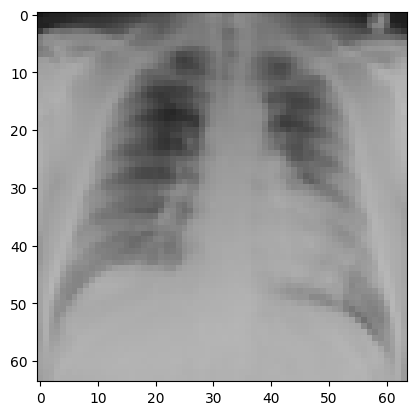

In [14]:
img, label = dataset[28]
show_image(img, label)